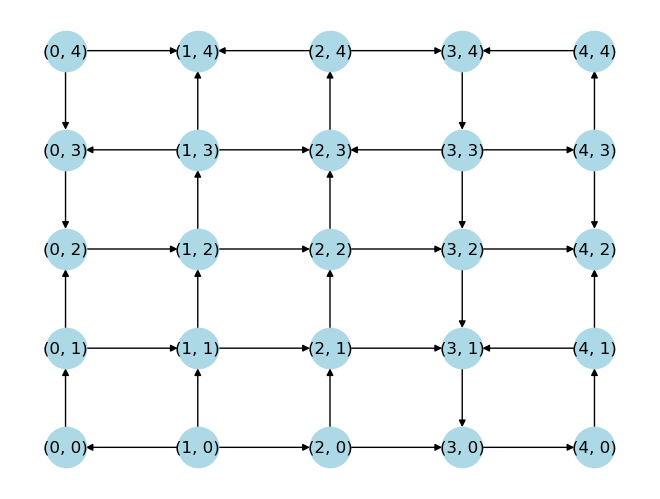

In [1]:
# NETWORKX DIRECTED LATTICE
# A. The minimum path from the starting point to the goal.
# B. Which nodes can be accessed from a given node.

# INIT
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

%matplotlib inline   
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

# CREATE A RANDOMLY DIRECTED LATTICE NETWORK
# SELECT GRID DIMENSIONS BELOW
G = nx.grid_2d_graph(5,5)       # Forms an m x n lattice
pos = {(i,j): np.array([i,j]) for i in range(10) for j in range(10)} #Node locations from coordinates
H = nx.DiGraph(G)               # Makes the graph directional (arrows go in both directions)

# Randomly remove either direction from the double arrows:
rem = []                             # List of arrows to remove
for (u,v) in H.edges:                # Runs the edges of the network
    if (u,v) not in rem and (v,u) not in rem: # If both directions are missing from the deletion list
        if rnd.randint(0, 1) == 0:   # Random number 0 or 1
            rem.append((u,v))        # Add edge (u,v) to the removal list 
        else:
            rem.append((v,u))        # Add edge (v,u) to the removal list 
H.remove_edges_from(rem)             # Remove the elements of the list 'rem' from the graph H

# DRAW THE LATTICE
nx.draw(H,
        pos,
        node_size = 840,            
        node_color= 'lightblue',     
        with_labels=True,            # Show node names
        edge_color= 'k')             # Black

In [2]:
# A. MINIMUM PATH
# SELECT the coordinates of the starting point and the destination point BELOW:
x0 = 4                # Start
y0 = 4

x1 = 4                # End
y1 = 0

try:   # If the path exists:
    p = (nx.shortest_path(H, source=(x0,y0), target=(x1,y1))) 
    print("The path nodes:")
    print(p)
except nx.NetworkXNoPath:                   # If there is no path, this avoids the error message.
    print('No path')
    

The path nodes:
[(4, 4), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0)]


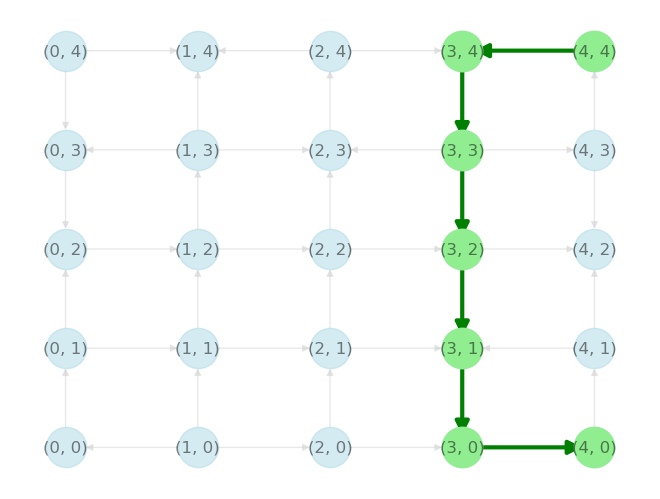

In [3]:
# If a path is found, we plot it on the graph: 
elist = [[p[i], p[i+1]] for i in range(len(p)-1)]     # Path edges
#print("Path edges:")
#print(elist)

nx.draw(H,
        pos,
        node_size = 840,             
        node_color= 'lightblue',    
        alpha = 0.5,                                  # Dims the nodes that are not on the path.
        with_labels=True,                             # Visible node names  
        edge_color= 'lightgray')             
nx.draw_networkx_nodes(H, pos, p, node_size = 840, node_color='lightgreen')     # Colored nodes
nx.draw_networkx_edges(H, pos, elist, edge_color='g',arrowsize=20, width=3.0)   # Colored edges
plt.show()

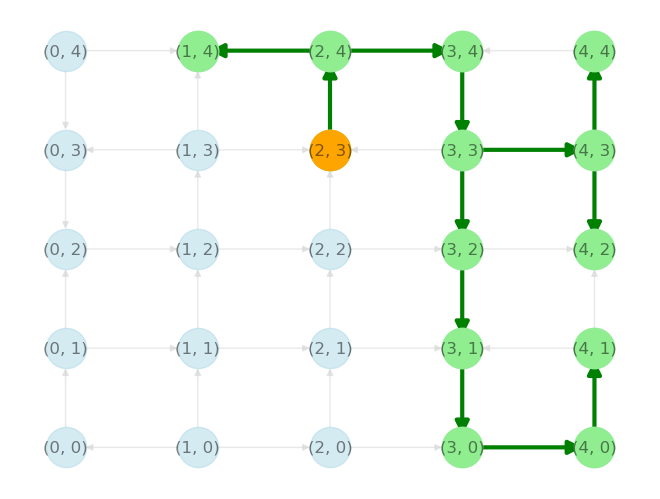

In [4]:
# B. WHICH NODES CAN BE REACHED FROM THE NODE (m,n):
# SELECT THE COORDINATES OF THE STARTING POINT BELOW
m = 2
n = 3
node0  = [(m, n)]               # To be colored in printing
edges = []                      # All traversable edges that can be reached from the origin (m,n).
nodes = []                      # All traversable nodes that can be reached from the origin (m,n).
pths = nx.single_source_shortest_path(H, (m,n)) # A dictionary with endpoints as keys..
                                                # and as values the paths (nodes) to them.

# Color all transportable edges for printing.
for no in pths:                 # 'no'is the end node and 'pths' is the key of the dictionary
    nodes.append(no)
    p = pths[no]                # A node path leading to the endpoint 'no'
    elist = [[p[i], p[i+1]] for i in range(len(p)-1)]     # Path edges to node 'no'
    #print("Path edges:")
    #print(elist)
    for e in elist:
        if e not in edges:
            edges.append(e)
            
node0  = [(m, n)]
nx.draw(H,
        pos,
        node_size = 840,             
        node_color= 'lightblue',     
        alpha = 0.5,                                      # Dims the nodes that are not reachable.
        with_labels=True,                                 # Visible node names 
        edge_color= 'lightgray')                          # Dimmed 
nx.draw_networkx_nodes(H, pos, nodes, node_size = 840, node_color='lightgreen') # Reachable nodes
nx.draw_networkx_nodes(H, pos, node0, node_size = 840, node_color='orange')     # starting node
nx.draw_networkx_edges(H, pos, edges, edge_color='g',arrowsize=20, width=3.0)   # Print colored edges

plt.show()

   